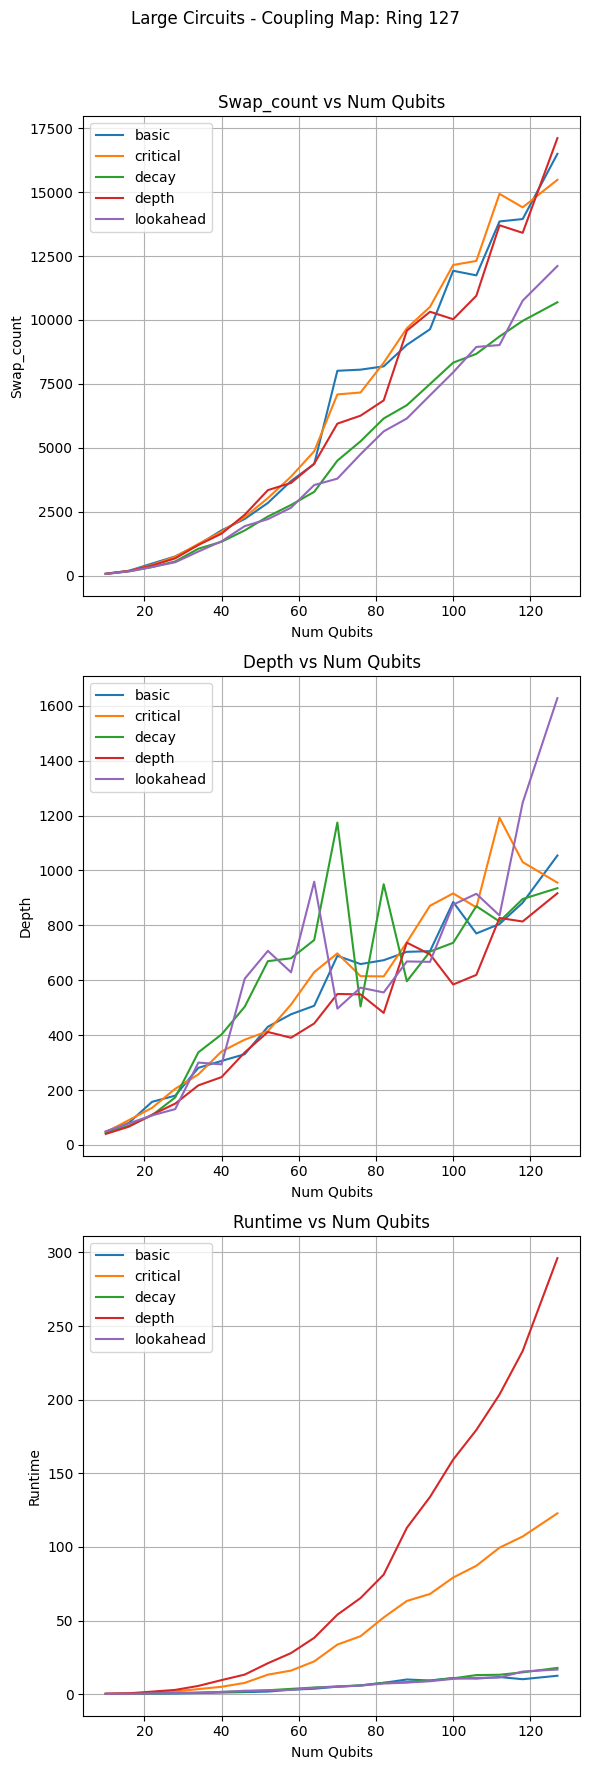

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

def plot_coupling_map_comparison(csv_filepaths, cmap, title):
    # Metrics to plot
    metrics = ['swap_count', 'depth', 'runtime']
    
    # Initialize a DataFrame to accumulate the averaged data
    averaged_data = None
    
    # Iterate over the CSV files to accumulate the data
    for csv_filepath in csv_filepaths:
        # Read the CSV file
        df = pd.read_csv(csv_filepath)
        
        # Group by relevant columns and compute the mean of each group
        grouped = df.groupby(['num_qubits', 'heuristic', 'cmap', 'trials', 'seed']).mean().reset_index()
        
        if averaged_data is None:
            averaged_data = grouped
        else:
            # Sum the data points for averaging later
            averaged_data = pd.concat([averaged_data, grouped])
    
    # Average the accumulated data
    averaged_data = averaged_data.groupby(['num_qubits', 'heuristic', 'cmap']).mean().reset_index()
    
    # Filter data for the specified coupling map
    subset_cmap = averaged_data[averaged_data['cmap'] == cmap]
    
    if subset_cmap.empty:
        print(f"No data available for coupling map '{cmap}'.")
        return
    
    # Create a figure with three subplots (one for each metric)
    fig, axes = plt.subplots(3, 1, figsize=(6, 18))
    
    # Iterate over each metric
    for col, metric in enumerate(metrics):
        ax = axes[col]
        for heuristic in subset_cmap['heuristic'].unique():
            subset_heuristic = subset_cmap[subset_cmap['heuristic'] == heuristic]
            
            # Smoothing the data using spline interpolation
            x = subset_heuristic['num_qubits']
            y = subset_heuristic[metric]
            
            # Plotting the smooth line without markers
            ax.plot(x, y, label=heuristic)
        
        # Set the title and labels
        ax.set_title(f'{metric.capitalize()} vs Num Qubits')
        ax.set_xlabel('Num Qubits')
        ax.set_ylabel(metric.capitalize())
        ax.legend()
        ax.grid(True)

    # Set the overall title for the figure
    plt.suptitle(f'{title} - Coupling Map: {cmap}')

    # Adjust layout for better spacing
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Show the plot
    plt.show()
# Example usage
csv_files = ['results/qft_large.csv', 'results/ghz_large.csv', 'results/qv_large.csv']
cmap = "Ring 127"
plot_coupling_map_comparison(csv_files, cmap, "Large Circuits")
